Module 1 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_dir = "dermalscan_AI"
categories = ["wrinkles", "dark_spots", "puffy_eyes", "clear_skin"]

In [3]:
data = []

for label in categories:
    folder = os.path.join(base_dir, label)
    print("Reading:", folder)
if os.path.exists(folder):
    for file in os.listdir(folder):
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            data.append([file, label])

df = pd.DataFrame(data, columns=["filename", "label"])
df.to_csv("labels.csv", index=False)
df.head()

Reading: dermalscan_AI\wrinkles
Reading: dermalscan_AI\dark_spots
Reading: dermalscan_AI\puffy_eyes
Reading: dermalscan_AI\clear_skin


Empty DataFrame
Columns: [filename, label]
Index: []

In [10]:
import os
import pandas as pd

base_dir = r"C:\Users\Admin\OneDrive\Desktop\Module1\dataset" 
categories = ["wrinkles", "dark_spots", "puffy_eyes", "clear_skin"]

data = []

print("Starting to scan folders...")

for label in categories:
    folder = os.path.join(base_dir, label)
    
    if os.path.exists(folder):
        # Count files to make sure we found them
        files = [f for f in os.listdir(folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
        print(f"Found {len(files)} images in: {label}")
        
        for file in files:
            data.append([file, label])
    else:
        print(f"ERROR: Could not find folder: {folder}")

df = pd.DataFrame(data, columns=["filename", "label"])

print("-" * 30)
print(f"Total images loaded: {len(df)}")

Starting to scan folders...
Found 300 images in: wrinkles
Found 303 images in: dark_spots
Found 300 images in: puffy_eyes
Found 300 images in: clear_skin
------------------------------
Total images loaded: 1203


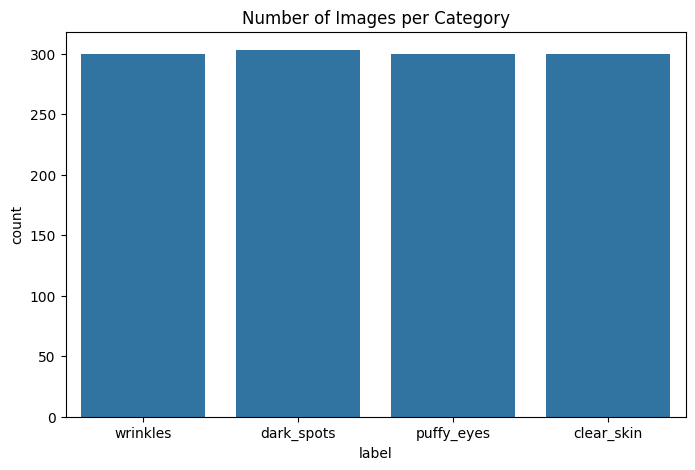

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Number of Images per Category')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = df['filename']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Split Successful!")
print(f"Training images: {len(X_train)}")
print("-" * 30)
print(f"Testing images:  {len(X_test)}")
print("-" * 30)
print("\nTraining Set Balance:")
print(y_train.value_counts())

Data Split Successful!
Training images: 962
------------------------------
Testing images:  241
------------------------------

Training Set Balance:
label
dark_spots    242
puffy_eyes    240
clear_skin    240
wrinkles      240
Name: count, dtype: int64


Module 2 

Found 977 images belonging to 4 classes.


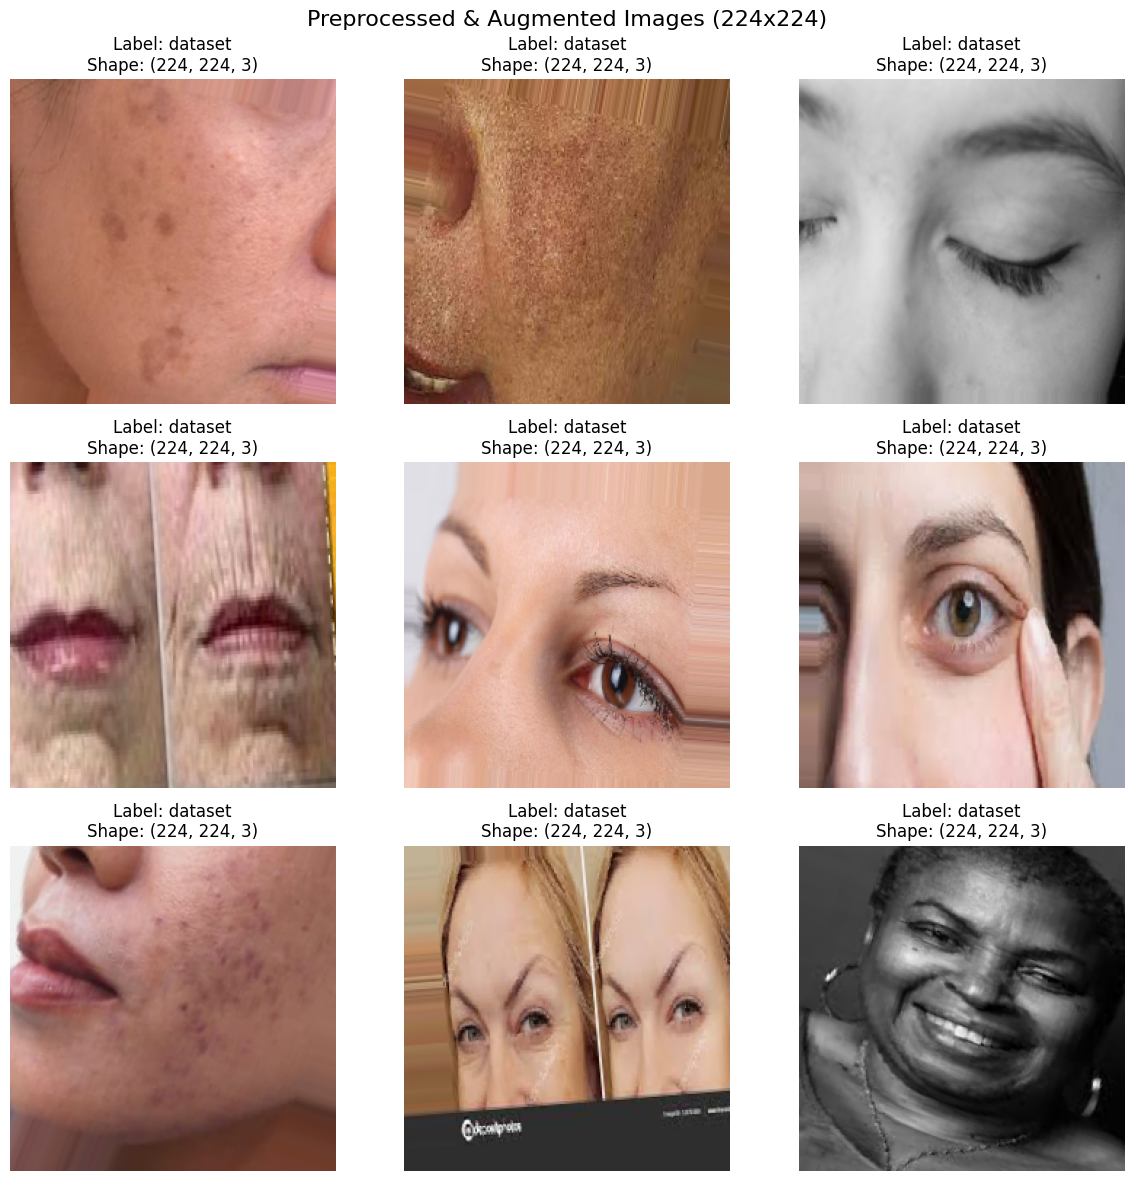

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "." 

train_datagen = ImageDataGenerator(
    rescale=1./255,             
    rotation_range=20,         
    zoom_range=0.2,            
    horizontal_flip=True,       
    width_shift_range=0.1,     
    height_shift_range=0.1,     
    fill_mode='nearest',        
    validation_split=0.2        
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical',            # THIS performs One-Hot Encoding
    subset='training',
    shuffle=True
)

def visualize_augmentation(generator):
  
    x_batch, y_batch = next(generator)

    class_dict = generator.class_indices
    label_map = {v: k for k, v in class_dict.items()}

    plt.figure(figsize=(12, 12))
    plt.suptitle("Preprocessed & Augmented Images (224x224)", fontsize=16)

    for i in range(9): 
        plt.subplot(3, 3, i + 1)
        
        # Display image
        plt.imshow(x_batch[i])
        class_index = np.argmax(y_batch[i])
        class_name = label_map[class_index]
        
        plt.title(f"Label: {class_name}\nShape: {x_batch[i].shape}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
try:
    visualize_augmentation(train_generator)
except Exception as e:
    print(f"Error: Could not visualize. Make sure 'DATA_DIR' points to a folder containing class subfolders. \nError details: {e}")

Found 243 images belonging to 4 classes.


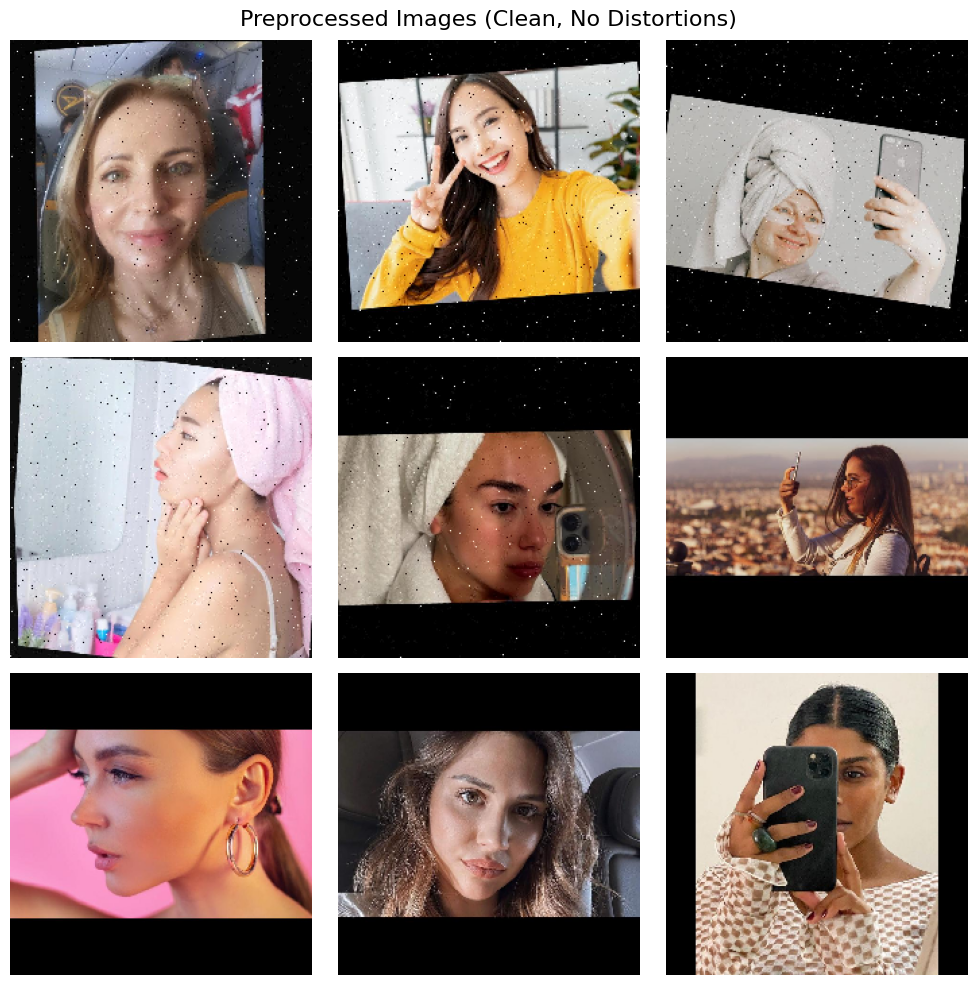

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Settings
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "."  


preprocess_datagen = ImageDataGenerator(
    rescale=1./255,          
    validation_split=0.2     
)

# 2. Load Images
val_generator = preprocess_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',     
    shuffle=False            
)

x_batch, y_batch = next(val_generator)
plt.figure(figsize=(10, 10))
plt.suptitle("Preprocessed Images (Clean, No Distortions)", fontsize=16)

for i in range(min(9, len(x_batch))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Found 977 images belonging to 4 classes.


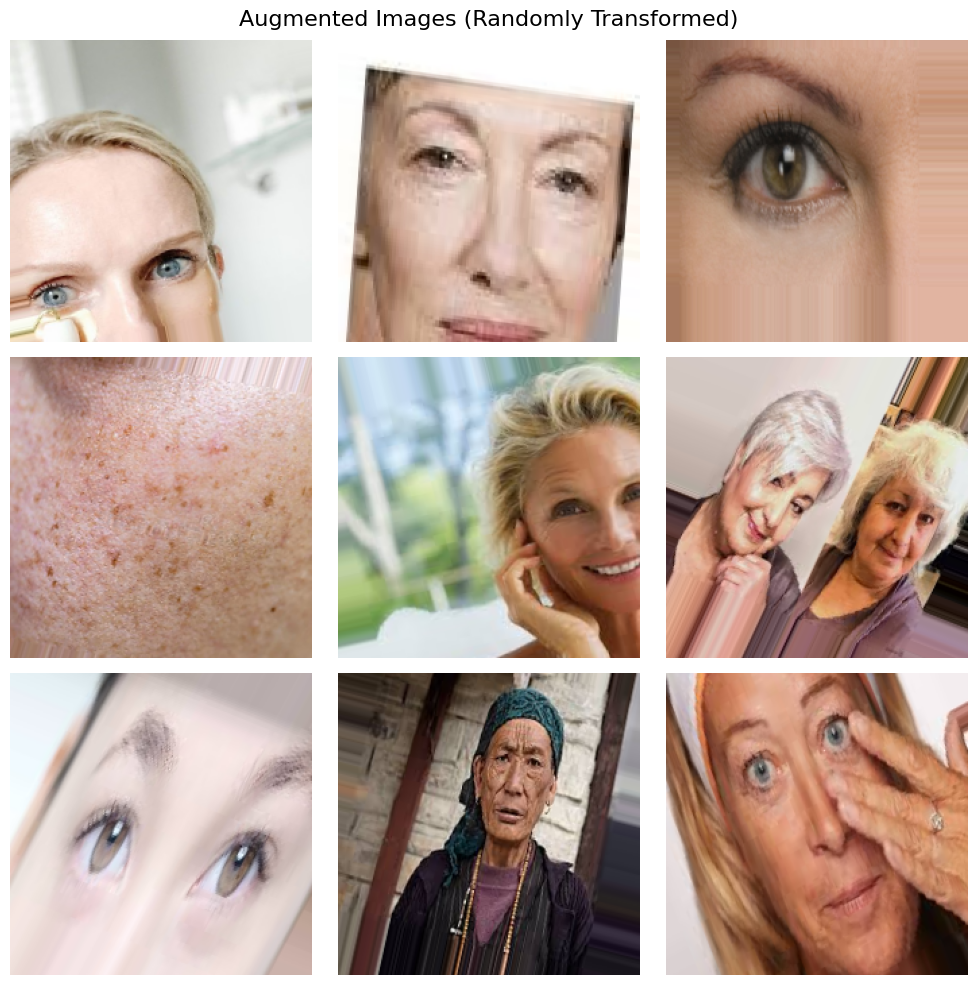

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "."  

augment_datagen = ImageDataGenerator(
    rescale=1./255,             
    rotation_range=30,         
    zoom_range=0.3,             
    horizontal_flip=True,     
    width_shift_range=0.1,     
    height_shift_range=0.1,    
    fill_mode='nearest',        
    validation_split=0.2
)

train_generator = augment_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',          
    shuffle=True                
)

x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
plt.suptitle("Augmented Images (Randomly Transformed)", fontsize=16)

for i in range(min(9, len(x_batch))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Module 3 

In [16]:
from tensorflow.keras.applications import EfficientNetB0

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt

NUM_CLASSES = 4  
IMG_SIZE = 224
dataset_path = r"C:\Users\Admin\OneDrive\Desktop\Module1\dataset" 

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    label_mode='categorical' 
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    label_mode='categorical'
)


base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(NUM_CLASSES, activation='softmax') 
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Found 1203 files belonging to 4 classes.
Using 963 files for training.
Found 1203 files belonging to 4 classes.
Using 240 files for validation.
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5846 - loss: 1.0375 - val_accuracy: 0.7708 - val_loss: 0.7362
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7985 - loss: 0.6332 - val_accuracy: 0.8125 - val_loss: 0.5853
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8183 - loss: 0.5209 - val_accuracy: 0.8292 - val_loss: 0.5263
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8422 - loss: 0.4498 - val_accuracy: 0.8292 - val_loss: 0.4904
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8598 - loss: 0.4104 - val_accuracy: 0.8333 - val_loss: 0.4718
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8827 - loss: 0.3720 - val_accuracy: 0.8458 - val_loss: 0.4567
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8816 - loss: 0.3550 - val_accuracy: 

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.keras', 
    monitor='val_accuracy', 
    save_best_only=True
)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
csv_logger = CSVLogger('training_log.csv', append=False, separator=',')
my_callbacks = [early_stop, checkpoint, reduce_lr, csv_logger]
print("All callbacks successfully initialized!")

All callbacks successfully initialized!


Model saved successfully as dermalscan_model.h5


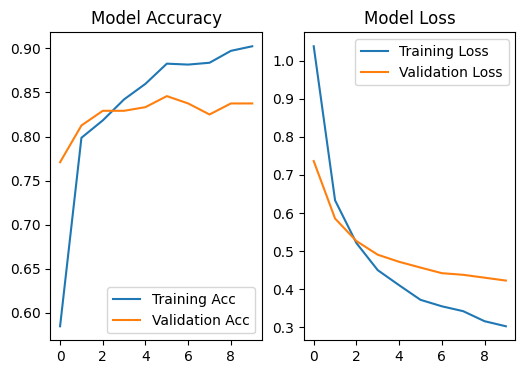

In [20]:
model.save('dermalscan_model.keras')
print("Model saved successfully as dermalscan_model.h5")

# Plotting Accuracy
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Model Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

Module 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


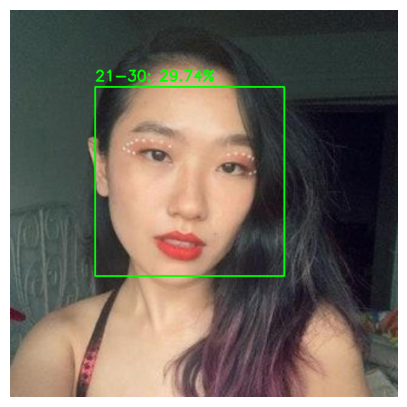

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


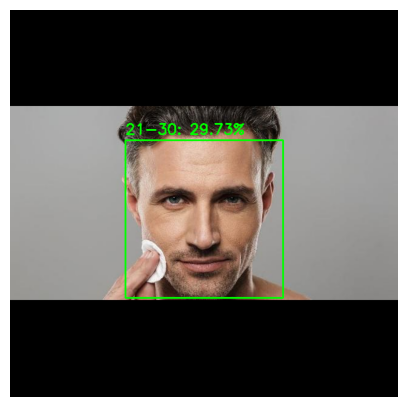

In [21]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# 1. Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 2. Load your trained model
model = load_model('dermalscan_model.h5') 
categories = ['0-20', '21-30', '31-40','41-50', '51-60', '61+'] # Adjust based on your specific classes

def process_image(image_path):
    # Read image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 3) # Changed from 1.3, 5
    for (x, y, w, h) in faces:
        # Draw the visual box for the user
        cv2.rectangle(img, (x, y), (x+w, y+h), (0,256, 0), 2)

        # FIX: ADD PADDING TO THE CROP
        # We take 20% extra space around the face so the model sees wrinkles/forehead
        padding = int(w * 0.2)
        y1, y2 = max(0, y - padding), min(img.shape[0], y + h + padding)
        x1, x2 = max(0, x - padding), min(img.shape[1], x + w + padding)
        
        # Crop the padded region
        roi_color = img[y1:y2, x1:x2]
        
        # Standard Preprocessing
        roi_resized = cv2.resize(roi_color, (224, 224)) 
        roi_normalized = roi_resized / 255.0
        roi_reshaped = np.reshape(roi_normalized, (1, 224, 224, 3))

        # Prediction
        prediction = model.predict(roi_reshaped)
        max_idx = np.argmax(prediction)
        
        # Display the prediction with the fixed label list
        label = f"{categories[max_idx]}: {prediction[0][max_idx]*100:.2f}%"
        cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        
    # Show Output
    import matplotlib.pyplot as plt
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display inside the notebook
    plt.figure(figsize=(5,10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Run it

process_image(r'c:\Users\Admin\OneDrive\Desktop\Module1\dataset\clear_skin\clear_skin_035.jpg')
process_image(r'c:\Users\Admin\OneDrive\Desktop\Module1\dataset\clear_skin\clear_skin_295.jpg')